In [46]:
import pandas as pd
from pre_processor import PreProcessor
from train_setup import Model_selection

pd.set_option('future.no_silent_downcasting', True)
dataset0=pd.read_csv('dataset0.csv')
dataset1=pd.read_csv('dataset1.csv')
dataset2=pd.read_csv('dataset2.csv')
dataset3=pd.read_csv('dataset3.csv')
dataset4=pd.read_csv('dataset4.csv')



In [47]:
### Dataset0 Specific Processing
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset0['total_calls']=dataset0['total_day_calls']+dataset0['total_eve_calls']+dataset0['total_night_calls']
dataset0['total_minutes']=dataset0['total_day_minutes']+dataset0['total_eve_minutes']+dataset0['total_night_minutes']
dataset0['total_charges']=dataset0['total_day_charge']+dataset0['total_eve_charge']+dataset0['total_night_charge']
dataset0.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)
dataset0['churn'] = dataset0['churn'].replace({'no':0,'yes':1})
churn_column = dataset0['churn']
dataset0.drop('churn',axis=1,inplace=True)
dataset0['churn'] = churn_column
###THIS SECTION IS DATASET SPECIFIC PROCESSING


In [48]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['CustomerID', 'Churn Label','Churn Reason','Churn Score','CLTV','Lat Long', 'Count','Country','State']
dataset1=dataset1.drop(columns=drop_columns)
dataset1['Zip Code']=dataset1['Zip Code'].astype(str)
dataset1['Total Charges'] = pd.to_numeric(dataset1['Total Charges'], errors='coerce')
###THIS SECTION IS DATASET SPECIFIC PROCESSING


In [49]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['customerID']
dataset3.drop(drop_columns,axis=1,inplace=True)
dataset3['TotalCharges']=pd.to_numeric(dataset3['TotalCharges'],errors='coerce')
dataset3['Churn']=dataset3['Churn'].replace({'Yes':1,'No':0})
dataset3['Churn']=dataset3['Churn'].astype(float)
###THIS SECTION IS DATASET SPECIFIC PROCESSING

In [50]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['RowNumber','CustomerId','Surname']
dataset4.drop(drop_columns, axis=1, inplace=True)
###THIS SECTION IS DATASET SPECIFIC PROCESSING

In [51]:
dataset0.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_calls', 'total_minutes',
       'total_charges', 'churn'],
      dtype='object')

In [52]:
label_column0 = 'churn'
pre_processor0 = PreProcessor(dataset0)
pre_processor0.rename_label(label_column0)
binary_encode_columns=['state','area_code','international_plan','voice_mail_plan']
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']


pre_processor0.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()

pre_processor0.calculate_feature_importance()
pre_processor0.remove_features_by_importance(0.01)
X_train,X_test,y_train,y_test = pre_processor0.train_test_split()



model_select0=Model_selection()
model_select0.train(X_train,y_train,X_test,y_test,n_trials_=1)


[I 2024-06-11 12:28:16,955] A new study created in memory with name: no-name-9c133a5f-dd6f-4af7-a3fb-37b84d7a2a4b
[I 2024-06-11 12:28:18,279] Trial 0 finished with value: 0.8878984203803743 and parameters: {'n_estimators': 143, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8878984203803743.
[I 2024-06-11 12:28:18,280] A new study created in memory with name: no-name-8592dda7-92e7-4598-87a9-389815031dfb
[I 2024-06-11 12:28:22,941] Trial 0 finished with value: 0.8637696720062811 and parameters: {'num_layers': 1, 'layer1_size': 63, 'layer2_size': 40, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006323149943530548}. Best is trial 0 with value: 0.8637696720062811.
[I 2024-06-11 12:28:22,942] A new study created in memory with name: no-name-41c54778-0bef-4f4b-98d4-3f697320327a
[I 2024-06-11 12:28:31,348] Trial 0 finished with value: 0.9941813047095633 and parameters: {'n_estimators': 51, 'learning_rate': 0.07431387271230483, 'max_depth':

[I 2024-06-11 12:29:03,616] A new study created in memory with name: no-name-71f22ad9-3c89-49e7-98fd-7e1eaee4b5ba
[I 2024-06-11 12:29:04,231] Trial 0 finished with value: 0.8416464891041162 and parameters: {'n_estimators': 14, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8416464891041162.
[I 2024-06-11 12:29:04,232] A new study created in memory with name: no-name-7356a033-ea3e-4ab0-9507-58112dc1ce62
[I 2024-06-11 12:29:13,648] Trial 0 finished with value: 0.8248184019370459 and parameters: {'num_layers': 1, 'layer1_size': 61, 'layer2_size': 37, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017372638768631608}. Best is trial 0 with value: 0.8248184019370459.
[I 2024-06-11 12:29:13,649] A new study created in memory with name: no-name-18a7c5dd-10b2-44e1-b8d4-65e3b74d74da
[I 2024-06-11 12:30:37,488] Trial 0 finished with value: 0.9024213075060533 and parameters: {'n_estimators': 133, 'learning_rate': 0.05244719088807651, 'max_depth

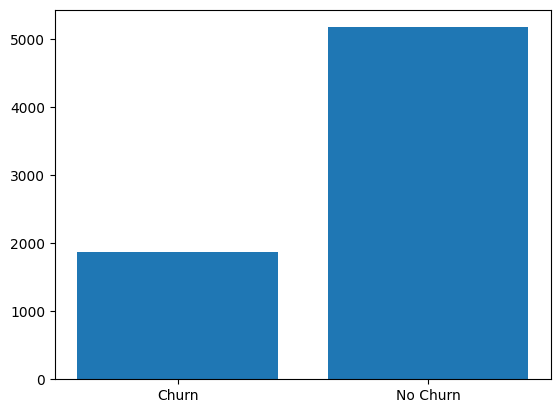

In [53]:
from pre_processor import PreProcessor


label_column1 = 'Churn Value'
pre_processor1 = PreProcessor(dataset1)
pre_processor1.rename_label(label_column1)
binary_encode_columns=['City','Zip Code']
one_hot_encode_columns=['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method']
ordinal_encode_columns=[]
scaling_columns=[column for column in dataset1.columns if column not in binary_encode_columns+one_hot_encode_columns+ordinal_encode_columns+[label_column1]]



pre_processor1.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()

pre_processor1.calculate_feature_importance()
pre_processor1.remove_features_by_importance(0.01)
X_train,X_test,y_train,y_test = pre_processor1.train_test_split()

model_select1=Model_selection()
model_select1.train(X_train,y_train,X_test,y_test,n_trials_=1)